# <center> CITS5508 Lab sheet 2: Dry Bean Dataset </center>



**Name:** Varun Jain <br>
**Student Number:** 21963986 <br>
**Date Due:** 19th March 2021 <br>

## 1.0 Introduction

The data to be analysed, **Dry Bean Dataset**, provided by the UWA CITS5508 Team, is supplied from the UCI Machine Learning webpage. The Dry Bean Dataset contains relevant information about the characteristics of a Dry Bean. Dry Beans have been characterised into several different types, with each bean having their own unqiue size and shape. Dataset stores 7 distict classifcations with each instance consisting of a total of 16 features; 12 dimensions and 4 shapes forms. 

## 2.0 Importing Libraries

In [7]:
import os
from openpyxl import load_workbook
import pandas as pd #used for handling the dataset 
import openpyxl
import numpy as np
import sklearn.metrics as metrics
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # used for splitting the dataset into a training and test set. 
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## 3.0 Import Dataset

The function will load the dry bean data and return a Pandas DataFrame object. 

In [8]:
#Ask her how the data is going to be loaded into the file 
def load_drybean_data():
    dry_bean_path = os.path.join("DryBeanDataset", "Dry_Bean_Dataset.xlsx")
    return pd.read_excel(dry_bean_path)

## 4.0 Exploratory Data Analysis

### 4.1 Data Analysis

In [9]:
#All the data in the Panda's Dataframe is stored in 'dry_bean_data'
#return the top 5 rows
dry_bean_data = load_drybean_data()
dry_bean_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [10]:
dry_bean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [11]:
#Shows a summary of all the numerical attributes. 
dry_bean_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Using the Dataframes head(), info() and describe() methods, we discover that there is 13611 distinct instances with each instance containing the characteristics of a dry bean. There are 17 attributes with all of them being a numerical attribute, except the Class field. Out of the 16 numerical attributes,mostly all attributes fall under the float64 datatype except Area and ConvexArea, which is an int64 datatype. The target variable is the object field known as Class. There is no need for any sort of data cleaning as all the characteristics have the same number of non-null values. 

In [12]:
#Calculate the total number of instances for each class in the original dry bean dataset.
dry_bean_data["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

The values in the **Class** field are categorial. 
From the results shown above, the **Class** field is divided into seven classifications of dry bean. There is an uneven distribution between the total count of each type of dry bean, this may pureply be due to an unbalanced dataset. The **BOMBAY** bean has the lowest number of instances in the dataset with a total count of 522 instances. Whereas, the **DERMANSON** bean has the highest number of instances with a grand total of 3546 instances. Therefore, the **DERMANSON** bean contains approximately 6.7 times more intances than **BOMBAY** bean in the dataset. 

### 4.2 Data Visualisation

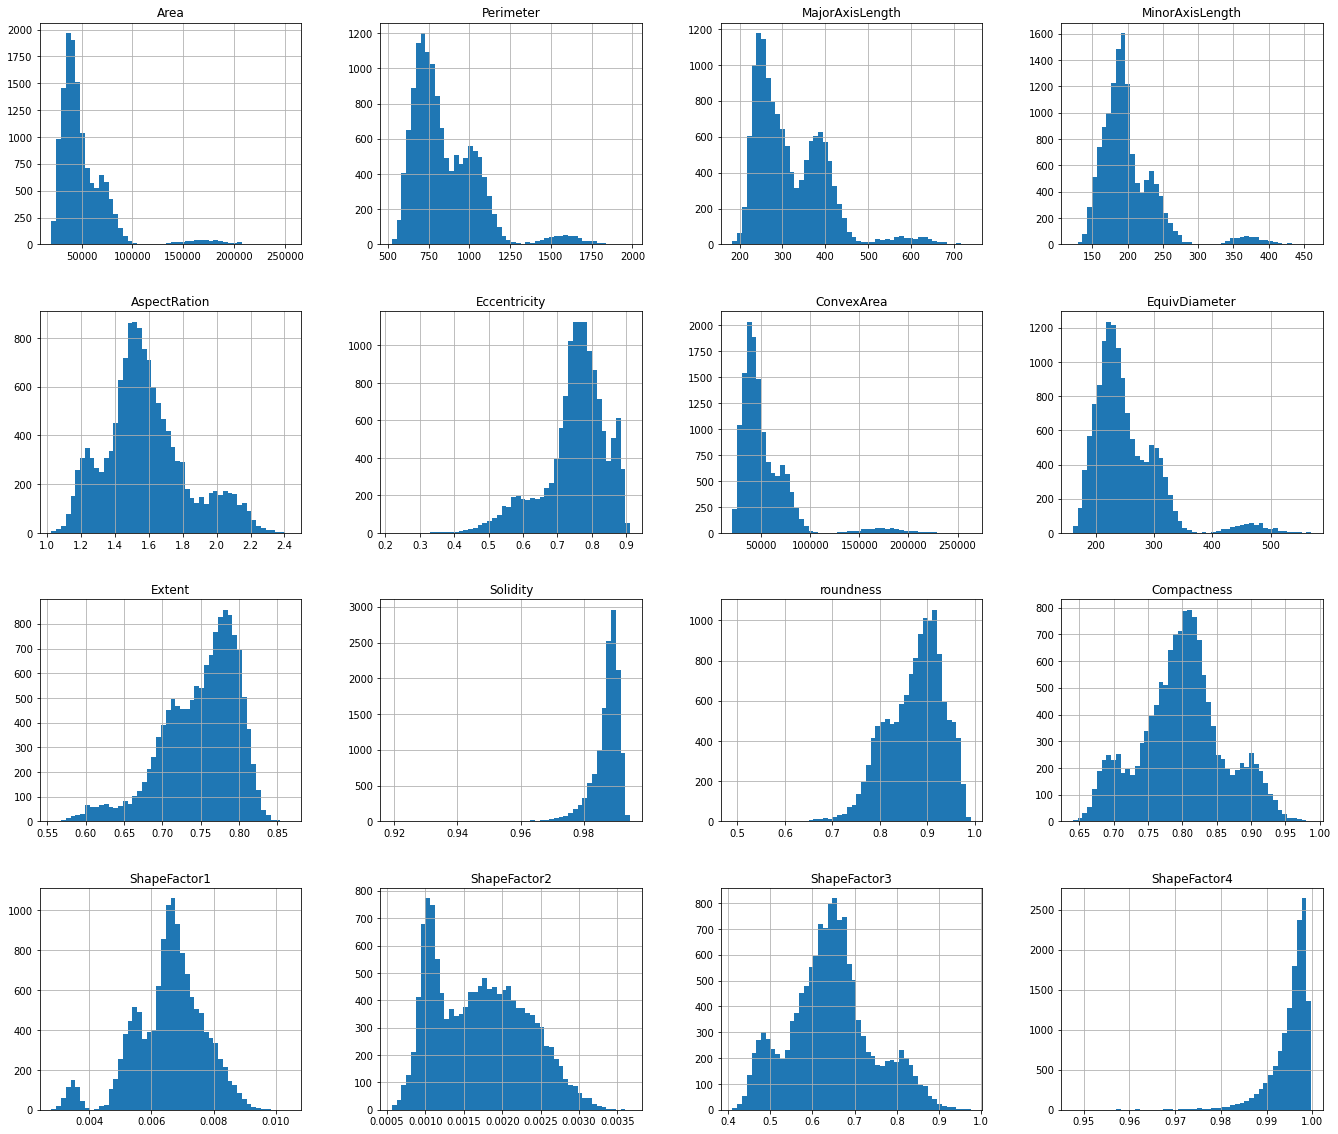

In [13]:
#A histogram shows the number of instances (on the vertical axis) that has a given value range (on the horizontal axis)
%matplotlib inline 
dry_bean_data.hist(bins=50, figsize=(23,20))
plt.show()

A histogram is ploted for each numerical attribute, the following observations show that: <br>
- Several of the numerical features are not distributed normally, they are either skewed to the right or the left. Therefore, the histogams are tail heavy. 
- Majority of the histogram plots above are either biomodal or multimodal except 'Solidity' and 'ShapeFactor4' which only has one peak. 
- All the numerical attributes have different scales.

### 4.3 Feature Selection

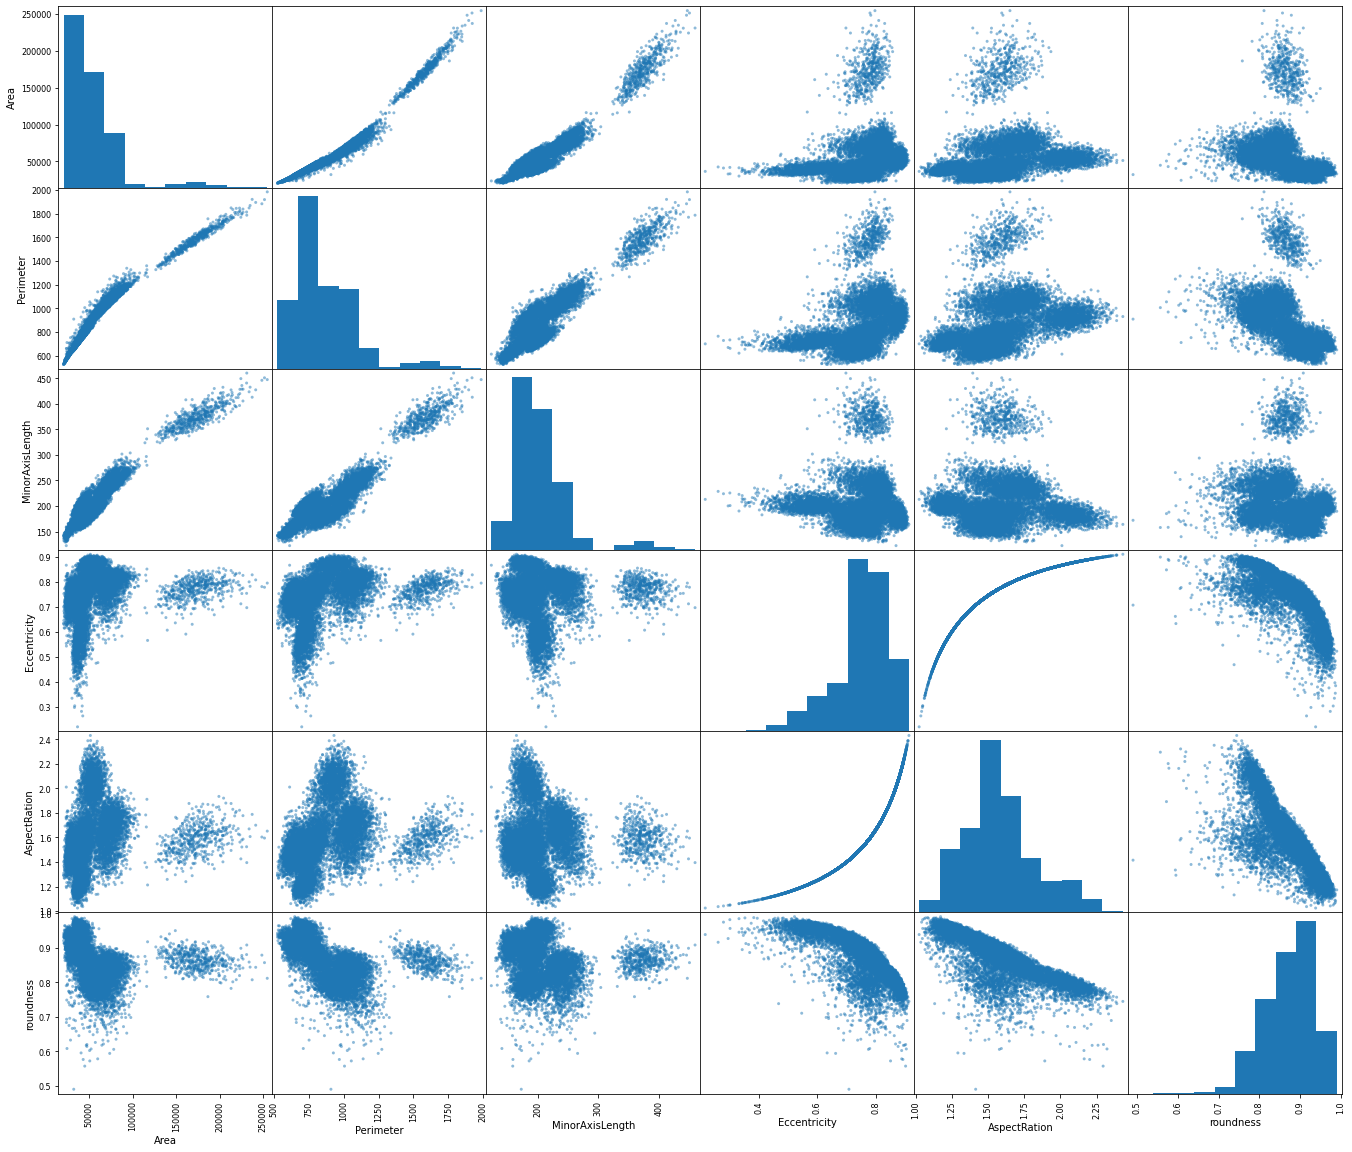

In [14]:
features = ["Area","Perimeter","MinorAxisLength", "Eccentricity","AspectRation","roundness"]
scatter_matrix(dry_bean_data[features], figsize=(23, 20));

The scatter plot above presents the following 
- Eccentricity and AspectRatio are strongly positively correlated and is in the shape of an exponential. 
- Area and Perimeter are moderately positvely correlated which can be seen as a cubic or a loosely linear 
- MinorAxisLength vs Area and Perimeter are moderately linearaly correlated in the positive direction. 
- The roundess and aspectRation seem to be negatively related to each other. 
- For the rest of the plots, they seem to be in 2 or more clusters. 

## 5.0 Data Preprocessing

### 5.1 Dependent and Indepedent Data

Seperate the independent and depedent data. The input features, (independent data), is represented by 'x' and the response (target) data, (dependent data), is represented by 'y'. In summary, the 'x' contains all the data except for the 'Class' column. 

In [15]:
x = dry_bean_data.drop("Class", axis=1)
y = dry_bean_data["Class"].copy()

### 5.2 Train Test Split

The data is partitioned into two sets, with a 80:20 ratio split. 80% of the data is allocated to the training set, and the remaining 20% is allocated to the testing set. 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
print(f"Train Set Size {x_train.shape[0]} instances") #The number of instances allocated to the x_train set.
print(f"Test Set Size {x_test.shape[0]} instances")   #The number of instances allocated to the x_test set.

Train Set Size 10888 instances
Test Set Size 2723 instances


### 5.3 Feature Scaling

Numerical input features with different scales generally do not perform well when Machine Learning Algorithms are applied to them, as this can result in false predications. To standardize the data, the feature scaling method called **Standardization**. Standardization rescales all the numerical input distributed values so that the mean is 0 and the standard deviation is 1. 

In [18]:
scaler = StandardScaler()
#astype(np.float64) converts all the int64 numerical attributes to float64
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
x_test_scaled = scaler.transform(x_test.astype(np.float64))

## 6.0 Classification

Training the model with the following Machine Learning Algorithms: Support Vector Classifier (SVM) and Stochastic Gradient Descent Classifier (SGD). We are going to perform a classification task using the SVM library and linear_model library. As previously stated, the response variable is the **Class** field.

### 6.1 Support Vector Classifier

For our multi-classification task, we are going to evaulate our model using the hyperparameters described below. For now, Scikit Learn SVM library precomupted/default values for the hyperparameter are going to be used to evaluate the model. 

The default kernal is the rbf kernal with the following parameters: C = 1.0 and gamma = 'scale'.  Alongside the Gausiaan kernal, we have further used polynomal, linear and sigmoid kernal to make comparsions with the Gaussian Kernal, to evaluate which kernal returns a higher accuracy which all other things remain constant and the hyperparameter randon_state = 42.

**Hyperparameters**
- random_state = 42: sets the seed the 42 and ensures that the svc classifier picks similar random instances to ensure accurate results for the same instances. 
- Kernal: refers to the type of kernal used. This includes rbf, linear, poly, and sigmoid. 
- C: is a Regularization parameter. C represents an error term which shows the tradeoff between the decision boundary and misclassification term. 
- Gamma: only used for the rbf kernal. Gamma impacts the curvature of the decision boundary.  





#### 6.1.0 Train

In [19]:
#Use Gaussian Kernal 
svclassifier_rgb = SVC(random_state = 42)
svclassifier_rgb.fit(x_train_scaled, y_train)
#Linear Kernal
svclassifier_linear = SVC(kernel = 'linear', random_state = 42)
svclassifier_linear.fit(x_train_scaled, y_train)
#sigmoid
svclassifier_sigmoid = SVC(kernel = 'sigmoid', random_state = 42)
svclassifier_sigmoid.fit(x_train_scaled, y_train)
#poly
svclassifier_poly = SVC(kernel = 'poly', degree=3, random_state = 42)
svclassifier_poly.fit(x_train_scaled, y_train)

SVC(kernel='poly', random_state=42)

#### 6.1.1 Prediction

Make predictations on the test dataset for each classifier. 

In [20]:
#Use rgb Kernal
svclassifier_rgb_pred = svclassifier_rgb.predict(x_test_scaled)
#Linear Kernal
svclassifier_linear_pred = svclassifier_linear.predict(x_test_scaled)
#sigmoid
svclassifier_sigmoid_pred = svclassifier_sigmoid.predict(x_test_scaled)
#poly
svclassifier_poly_pred = svclassifier_poly.predict(x_test_scaled)

#### 6.1.2 Evaluation

In [21]:
print("RGB Kernal: Accuracy:",metrics.accuracy_score(y_test, svclassifier_rgb_pred))
print("Linear: Kernal: Accuracy:",metrics.accuracy_score(y_test, svclassifier_linear_pred))
print("Sigmoid Kernal: Accuracy:",metrics.accuracy_score(y_test, svclassifier_sigmoid_pred))
print("Poly Kernal: Accuracy:",metrics.accuracy_score(y_test, svclassifier_poly_pred))

RGB Kernal: Accuracy: 0.9338964377524789
Linear: Kernal: Accuracy: 0.9283878075651855
Sigmoid Kernal: Accuracy: 0.7197943444730077
Poly Kernal: Accuracy: 0.9103929489533603


Comparing the performance of the different kernals that pass through the SVC() classifer, rgf kernal has the highest accuracy with 93.39% and Sigmoid has the lowest accuracy with 71.98%. Sigmoid is more suitable for binary classification. Since, the rgf kernal has the highest accurancy rating, we are now going to compute the SVG Classifier with different hyperparameters **'C'** and **'gamma'** values using the GridSearchCV functionality provided by Scikit Learn. 

#### 6.1.3 GridSearchCV for SVC Classifier

As determined, rgf is the best estimator. Now, we will compute rbf with different C and gamma values in order to find the best estimator values for hyper-parameters: **Gamma** and **C**. 
- Gamma includes default value plus all the values starting from 1 to 0.0001 divided by a factor of 10. 
- C includes the default value 1.0, and decreases and increased by a factor of 10. 
Building a model with each possible value specified in the GridSearchCV. 

In [22]:
#Lab Instructor asked to comment GridSearchCV Out as the exectution time can be too long 
#However, when exceuting, GridSearch should finish 2-3 minutes of the starting time. 
'''
param_grid = {'kernel': ['rbf'], 
              'C': [0.1, 1.0, 10, 100],  
              'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001]} 

svm_reg = SVC(random_state=42)
grid_search = GridSearchCV(svm_reg, param_grid, cv=2, verbose=2) 
grid_search.fit(x_train_scaled,y_train)
'''

"\nparam_grid = {'kernel': ['rbf'], \n              'C': [0.1, 1.0, 10, 100],  \n              'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001]} \n\nsvm_reg = SVC(random_state=42)\ngrid_search = GridSearchCV(svm_reg, param_grid, cv=2, verbose=2) \ngrid_search.fit(x_train_scaled,y_train)\n"

In [23]:
'''
#prints the best parameters 
grid_search.best_params_
'''

'\n#prints the best parameters \ngrid_search.best_params_\n'

In [24]:
'''
#Model Predication
yg_pred = grid_search.predict(x_test_scaled)
#Model Evaluation 
print("Accuracy:",metrics.accuracy_score(y_test, yg_pred))
'''

'\n#Model Predication\nyg_pred = grid_search.predict(x_test_scaled)\n#Model Evaluation \nprint("Accuracy:",metrics.accuracy_score(y_test, yg_pred))\n'

Grid_searchCV combines an estimator with a gridsearch and returns the best hyper_parameters. From the analysis, the best hyperparameter results were **{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}**. After computing the evalution, the accuracy has gone but but the difference between the default paramater values and Grid_searchCV parameters is very minimal. The model returns an accuracy of 93.46%. 

#### 6.1.4 Confusion Matrix

Due to the small difference in accuracy percentage between the default value evaluation and GridSearchCV evaluation, we will just use the the initial default model values to compute the confusion matrix. 

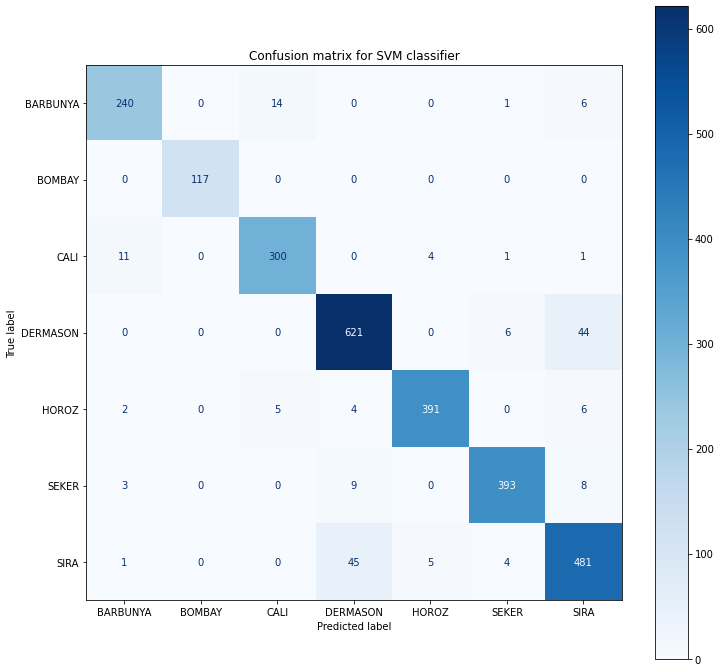

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))
matrix_svg = plot_confusion_matrix(svclassifier_rgb, x_test_scaled, y_test, cmap=plt.cm.Blues, ax = ax)
plt.title('Confusion matrix for SVC classifier')
plt.show(matrix_svg)
plt.show()

From the confusion matrix shown above, we can compute the following: 
- The diagonal cells dominate all of the other cells. This indicates that SVM machine learning algorithm accurately distinguishes all the true positives and true negatives. The DERMANSON bean has the highest number of correctly identified bean, but this result may be due to the unbalanced dataset. 
- DERMASON has been misclassified as SIRA, and vice versa. This indiciates that the DERMASON and SIRA may contain similar characteristics making it difficult for the machine learning algorithm to differentiate. So from the confusion matrix above, 44 DERMANSION beans have been misclassified as SIRA, and 45 SIRA beans have been misclassified as DERMANON.
- BARBUNYA has been misclassified as CALI but not as the same magnitude as DERMASON vs SIRA. We observe that, 14 BARBUNYA have been misclassified as CALI, and 11 CALI beans have been misclassified as BARBYNUA. 
- SIRA and DERMANSON seem to have the highest misclassification rate, compared to all the other classed. A total of 65 beans have been incorrectly identided as SIRA, and 58 beans as DERMANSON. 
- There is a low percentage of the algorithm falsely identifying the class of the dry bean. 
- BOMBAY seems to be perfect with zero misclassification, and achieve 100% in terms of correctly identifying the bean type as BOMBAY. 

#### 6.1.5 Classification Report 

In [27]:
print(classification_report(y_test,svclassifier_rgb_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.94       317
    DERMASON       0.91      0.93      0.92       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.97      0.95      0.96       413
        SIRA       0.88      0.90      0.89       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



### 6.2 Stochastic Gradient Descent (SGD) Classifier

Now its time to evaluate the model using Stochastic Gradient Descent (SGD) Classifier. SCG will run on the same training set, and from its performance, we will be able to make comparsions the two classifiers. 

Just as before, we will evaluate the model with its default hyperparameter values stated in the Scikit Learn Linear_model library. 

The default SGDClassifier hyperparameters to be analysised: loss, learning rate, alpa and penalty. The defaults values associated with this hyperparameters are: <br> 
- penalty = 'I2'
- alpha: 0.0001
- learning_rate = 'optimal'.

**Hyperparameters** 
- Learning Rate: determines the step size of each iteration - learning rate schedule. Options include: contant, optimal,invalscaling and adaptive.
- alpha: coefficient/constant multiple with the regularization term. Bigger the value of a, strong the regularization.
- penalty: is an regularization to be used. It can be either (I1 or I2). 


#### 6.2.1 Train Model

In [28]:
sgdclassifier = SGDClassifier(random_state = 42)
sgdclassifier.fit(x_train_scaled, y_train)

SGDClassifier(random_state=42)

#### 6.2.2 Prediction

In [29]:
test_pred= sgdclassifier.predict(x_test_scaled)

#### 6.2.3 Evaluation

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))

Accuracy: 0.919573999265516


SGDClassifier returns a fairly reasonable estimator with an accuray rate of 91.96%

#### 6.2.3 GridSearchCV for (SGD) Classifier

In [31]:
'''
params = {"alpha" : [0.0001, 0.001, 0.01, 0.1],"penalty" : ["l2", "l1"], "learning_rate":["optimal"]}
'''

'\nparams = {"alpha" : [0.0001, 0.001, 0.01, 0.1],"penalty" : ["l2", "l1"], "learning_rate":["optimal"]}\n'

In [32]:
#Note the exectuation time for this gridsearchCV is under 1-2 minutes,
#However, just commented it out for in case the it takes longer to exectue on the makrers computers
'''
sgdclassifier_grid = SGDClassifier(random_state = 42)
grid_search_sdg = GridSearchCV(sgdclassifier_grid, params, cv=2, verbose=2) 
grid_search_sdg.fit(x_train_scaled,y_train)
'''

'\nsgdclassifier_grid = SGDClassifier(random_state = 42)\ngrid_search_sdg = GridSearchCV(sgdclassifier_grid, params, cv=2, verbose=2) \ngrid_search_sdg.fit(x_train_scaled,y_train)\n'

In [33]:
'''
#Get the best paramaters
grid_search_sdg.best_params_
'''

'\n#Get the best paramaters\ngrid_search_sdg.best_params_\n'

In [34]:
'''
sdg_pred = grid_search_sdg.predict(x_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, sdg_pred))
'''

'\nsdg_pred = grid_search_sdg.predict(x_test_scaled)\nprint("Accuracy:",metrics.accuracy_score(y_test, sdg_pred))\n'

From the GridSearchAnalysis, the best hyperparameter results were **{'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l1'}**. After computing the evalution, the accuracy has gone but but the difference between the default paramater values and Grid_searchCV parameters is very minimal. The model returns an accuracy of 92.36%. Therefore for both, SGD Classifier and SVC Classifier, the default values are reasonable. 

#### 6.2.4 Confusion Matrix 

Due to the small difference in accuracy percentage between the default value evaluation and GridSearchCV evaluation, we will just use the the initial default model values to compute the confusion matrix. 

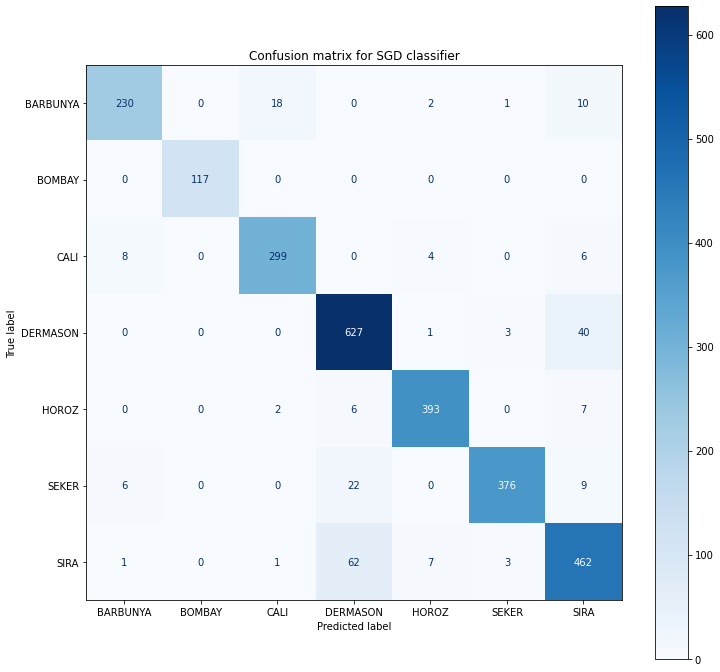

In [37]:
fig, ax = plt.subplots(figsize=(12, 12))
matrix_sgd = plot_confusion_matrix(sgdclassifier, x_test_scaled, y_test, cmap=plt.cm.Blues, ax = ax)
plt.title('Confusion matrix for SGD classifier')
plt.show(matrix_sgd)
plt.show()

From the confusion matrix shown above, we can compute the following: 
- The diagonal cells dominate all of the other cells. This indicates that SGD machine learning algorithm accurately distinguishes all the true positives and true negatives. There is a low percentage of the algorithm falsely identifying the class of the dry bean.
- BARBUNYA has been misclassified as CALI but not as the same magnitude as DERMASON vs SIRA. Only 18 BARBUNYA beans has been classified as CALI, and only 8 CALI beans have been classified as BARBUNYA. 
- DERMASON has been misclassified as SIRA, and vice versa. 40 of the DERMANSON bean has been misclassified as SIRA, and 62 SIRA bean has been misclassified at DERMANSON. 
- SIRA and DERMANSON seem to have the highest misclassification rate, compared to all the other classed. A total of 72 beans have been incorrectly identided as SIRA, and 80 beans as DERMANSON. 
-  The BOMBAY Class has the ideal 100%, no misclassification result. This indicates that all the BOMBAY beans have been identified correctly. This may be due unbalanced dataset causing a bias result. 

#### 6.2.5 Classification Report 

In [36]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.88      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.94      0.94       317
    DERMASON       0.87      0.93      0.90       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.98      0.91      0.94       413
        SIRA       0.87      0.86      0.86       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



## 7.0 Discussion

### 7.1 Compare the SVG and SGD Classifers Confusion Matrix:

- The diagonal columns for both classifers indicates the number of correct predictions classified (true positives). The classififers was mostly able to correctly distinguish between dry bean type. And each algoritm gave similar total of instances for each bean.  
- For both the classifiers, many of the beans for misclassified as SIRA for DERMANSON, and vice versa.  This indicates that there is a correlation between the two types of dry beans. The total number of SIRA and DERMANSON instances misclassified is higher when we compute the SGD classifier then the SVG Classifier. 
- For both the classifiers, misclassification rate for 'BOMBAY' is zero. This means that all the BOMBAY dry beans have been correctly classified. This may be due to the unbalanced dataset - the BOMBAY total instances are relatively must lower than the rest of the dry beans. 
- The cells next to the diagonal column shows low misclassification rate. 
- For both classifiers, low number of dry bean CALI has been misclassified for BARBUNYA.
- If you had to put both confusion matrix side by side, they are relatively the same. SVG performs better but not by a significnt amount. 


### 7.2 Experimental Results

Looking at the classification report in 6.1.5 for the SVC Classifier and 6.2.5 for the SDG Classifier, we observe the following 
- Overall the SVC Classifers performs better than the SDG Classifier. 
- The Accuracy for the SVC Classifer is higher than SDG Classifer, as previously stated. This means that the SVC Classifier can more accurately distinguish between the true positive and false positives. 
- The weighted average precision, recall and f1-score is higher by one percent for the SVC Classifier. In general. precision, recall and f1-score has a relatively larger value than the SDG Classifier except for the BOMBAY Dry Bean Class. 
- The Bombay Dry Bean seems to have the perfect score for both the SVG and SDG classifier. 


We have taken various hyperparameters values for both SVC and SDG classifiers: 
- the best hyperparameter values were {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} for the SVC Classifier 
- the best hyperparameter values were {'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l1'} for the SDG Classifier

These hyperparameters produced an accuracy rate of 93.46% and 92.36% for SVG and SDG Classifier, retrospectively.
As you can see, both have fairly high accuracy rate which basically measures how well the Machine Learning Algorithms are to classify each bean according to their class. Therefore, SVG Classifer performs better than the SDG classifier. 